# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

<b>Тариф «Смарт» </b>

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

<b>Тариф «Ультра» </b>

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<b>Примечание: </b>

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
from math import factorial

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
df_calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Поскольку в задании было прописано что звонки с нулевой продолжительностью - это пропущенные, не будем обращать на них внимание, это вполне нормально.

In [6]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [9]:
df_internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


С учетом что нулевых использований интернета достаточно много, а данные в столбце мегабайт имеют округление до сотых, могу сделать 2 предположения о природе данных нулей:

1) Клиент потратил сильно меньше 1 мб, и при округлении получился ноль. Примером такого потребления трафика может быть отправка текстовых сообщений в мессенджере.

2) Клиент использовал интернет в целях в которых оператор позволяет пользоваться безлимитом, но нам при постановке задания о таких акциях\услугах забыли упомянуть. К примеру оператор установил безлимит для использования интернета в социальных сетях.

В обоих случаях это не должно существенно повлиять на аналитику данных, потому что расчет и аналитику мы будем делать на основании гигабайтов, что на порядки выше возможной погрешности из-за килобайтов. 

In [10]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [13]:
df_tarif = pd.read_csv('/datasets/tariffs.csv')
df_tarif.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

Данные в хорошем состоянии, пропущенных значений нет. Единственное для анализа будет необходимо привести столбцы с датами к типу дат и поскольку каждый звонок округляется до целого числа минут необходимо также поправить данные в таблице по звонкам. По интернету и сообщениям суммировать трафик по месяцам.

В итоге необходимо свести все данные по звонкам, сообщениям и мегабайтам, в одну сводную таблицу по месяцам и пользователям чтобы дальше можно было высчитать сумму которую они платят в месяц.

## Подготовка данных

In [17]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [19]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [20]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users['month_reg'] = df_users['reg_date'].dt.month
df_users['month_churn'] = df_users['churn_date'].dt.month

Все пользователи подключились в 2018 году, значит на год можно не обращать внимания. Отключались тоже в 2018, поэтому в рамках нашего исследования за пустые значения можно обозначить число 12, так как те кто не отключался пользовались услугами 12 месяцев.

In [21]:
df_users['month_churn'] = df_users['month_churn'].fillna(12).astype('int')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,month_churn
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,12
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,12
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,12


In [22]:
df_calls['month'] = df_calls['call_date'].dt.month

In [23]:
df_calls_count = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'count').reset_index()
df_calls_count.describe()

,user_id,month,duration
count,3174.000000,3174.000000,3174.000000
mean,1251.555766,8.311594,63.833333
std,144.470630,2.910625,32.678036
min,1000.000000,1.000000,1.000000
25%,1126.000000,6.000000,41.000000
50%,1254.000000,9.000000,63.000000
75%,1378.000000,11.000000,83.000000
max,1499.000000,12.000000,244.000000


In [24]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls_pivot = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum').reset_index()
df_calls_pivot.head()

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [25]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet_pivot = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
df_internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [26]:
df_messages['message_month'] = df_messages['message_date'].dt.month
df_messages_pivot = df_messages.pivot_table(index = ['user_id', 'message_month'], values = 'message_date', aggfunc = 'count').reset_index()
df_messages_pivot.set_axis(['user_id', 'month', 'messages'], axis = 'columns', inplace = True)
df_messages_pivot.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Теперь нам надо свести все данные в одну таблицу, для этого нам нужно:

1) создать дата фрейм со столбцами о потраченных в каждый месяц минутах, мегабайтах и сообщениях. Преобразовать пропуски в 0, т.к. это значит пользователь не пользовался этой услугой.

3) притянуть информацию о тарифах по id_user.

4) добавить столбцы с расчетом итоговой потраченной суммы пользователем в месяц.

5) далее можно переходить к аналитике, построению гипотез и проверке гипотез.

In [27]:
total = df_calls_pivot.merge(df_internet_pivot, on = ['user_id', 'month'], how = 'outer')
total = total.merge(df_messages_pivot, on = ['user_id', 'month'], how = 'outer')
total = total.merge(df_users, on = 'user_id', how = 'outer')
total = total.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'month_reg', 'month_churn'], axis = 1)
total.head()

,user_id,month,duration,mb_used,messages,city,tariff
0,1000,5.0,159.0,2253.49,22.0,Краснодар,ultra
1,1000,6.0,172.0,23233.77,60.0,Краснодар,ultra
2,1000,7.0,340.0,14003.64,75.0,Краснодар,ultra
3,1000,8.0,408.0,14055.93,81.0,Краснодар,ultra
4,1000,9.0,466.0,14568.91,57.0,Краснодар,ultra


In [28]:
total['duration'] = total['duration'].fillna(0).astype('int')
total['mb_used'] = total['mb_used'].fillna(0).astype('int')
total['messages'] = total['messages'].fillna(0).astype('int')
total.query('month.isna()')

,user_id,month,duration,mb_used,messages,city,tariff
3214,1128,NaN,0,0,0,Волжский,ultra
3215,1371,NaN,0,0,0,Омск,smart


In [29]:
#df_users.query('user_id == 1128 or user_id == 1371')
#Поскольку данные клиенты хоть и не пользовались услугами связи, но были подключены к тарифу - они все равно заплатили месяц абонентской платы
#Поэтому можем заменить эти пропущенные значения на 12
total['month'] = total['month'].fillna(12)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id     3216 non-null int64
month       3216 non-null float64
duration    3216 non-null int64
mb_used     3216 non-null int64
messages    3216 non-null int64
city        3216 non-null object
tariff      3216 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 201.0+ KB


In [30]:
df_tarif.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff'], axis = 'columns', inplace = True)
total = total.merge(df_tarif, on = 'tariff', how = 'outer')
total.head()

,user_id,month,duration,mb_used,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159,2253,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172,23233,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340,14003,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408,14055,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466,14568,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [31]:
total['over_minute'] = total['duration'] - total['minutes_included']
total['over_mb'] = total['mb_used'] - total['mb_per_month_included']
total['over_messages'] = total['messages'] - total['messages_included']
total.head()

,user_id,month,duration,mb_used,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_minute,over_mb,over_messages
0,1000,5.0,159,2253,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2841,-28467,-978
1,1000,6.0,172,23233,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2828,-7487,-940
2,1000,7.0,340,14003,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2660,-16717,-925
3,1000,8.0,408,14055,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2592,-16665,-919
4,1000,9.0,466,14568,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2534,-16152,-943


In [32]:
def for_null(row):
    if row > 0:
        return(row)
    if row <= 0:
        return(0)
total['over_minute'] = total['over_minute'].apply(for_null)
total['over_mb'] = total['over_mb'].apply(for_null)
total['over_messages'] = total['over_messages'].apply(for_null)
total['over_gb'] = (total['over_mb'] / 1024).apply(np.ceil).astype('int')
total['total_price'] = total['rub_monthly_fee'] + (total['over_minute'] * total['rub_per_minute']) + (total['over_gb'] * total['rub_per_gb']) + (total['over_messages'] * total['rub_per_message'])
total['gb_used'] = (total['mb_used'] / 1024).apply(np.ceil).astype('int')
total.head()

,user_id,month,duration,mb_used,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_minute,over_mb,over_messages,over_gb,total_price,gb_used
0,1000,5.0,159,2253,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0,0,0,0,1950,3
1,1000,6.0,172,23233,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0,0,0,0,1950,23
2,1000,7.0,340,14003,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0,0,0,0,1950,14
3,1000,8.0,408,14055,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0,0,0,0,1950,14
4,1000,9.0,466,14568,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0,0,0,0,1950,15


In [33]:
df_total = total.drop(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'over_mb'], axis = 1)
df_total.head()

,user_id,month,duration,mb_used,messages,city,tariff,over_minute,over_messages,over_gb,total_price,gb_used
0,1000,5.0,159,2253,22,Краснодар,ultra,0,0,0,1950,3
1,1000,6.0,172,23233,60,Краснодар,ultra,0,0,0,1950,23
2,1000,7.0,340,14003,75,Краснодар,ultra,0,0,0,1950,14
3,1000,8.0,408,14055,81,Краснодар,ultra,0,0,0,1950,14
4,1000,9.0,466,14568,57,Краснодар,ultra,0,0,0,1950,15


### Вывод

Мы привели таблицы к виду подготовленному для исследования, посчитали итоговый расход в месяц у каждого клиента. Пора приступать к анализу данных.

## Аналитика данных

In [34]:
df_smart = df_total.query('tariff == "smart"')
df_ultra = df_total.query('tariff == "ultra"')

Сравним кол-во потребляемых услуг, между клиентами двух тарифов.

Text(0, 0.5, 'Кол-во записей')

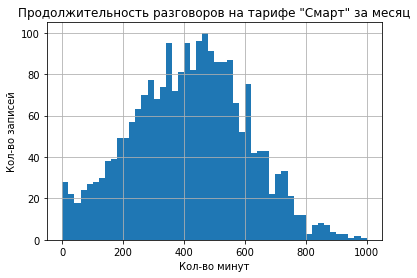

In [35]:
df_smart['duration'].hist(bins = 50, range = (0, 1000))
plt.title('Продолжительность разговоров на тарифе "Смарт" за месяц')
plt.xlabel("Кол-во минут")
plt.ylabel("Кол-во записей")

Text(0, 0.5, 'Кол-во записей')

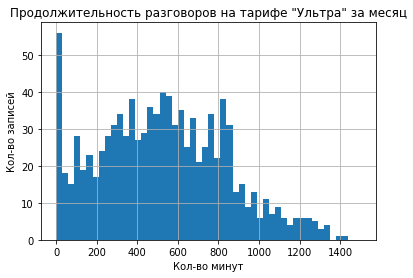

In [36]:
df_ultra['duration'].hist(bins = 50, range = (0, 1500))
plt.title('Продолжительность разговоров на тарифе "Ультра" за месяц')
plt.xlabel("Кол-во минут")
plt.ylabel("Кол-во записей")

Text(0, 0.5, 'Кол-во записей')

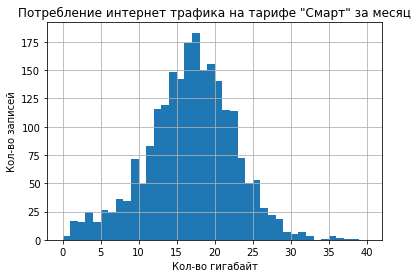

In [37]:
df_smart['gb_used'].hist(bins = 40, range = (0, 40))
plt.title('Потребление интернет трафика на тарифе "Смарт" за месяц')
plt.xlabel("Кол-во гигабайт")
plt.ylabel("Кол-во записей")

Text(0, 0.5, 'Кол-во записей')

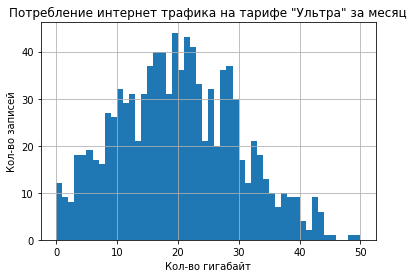

In [38]:
df_ultra['gb_used'].hist(bins = 50, range = (0, 50))
plt.title('Потребление интернет трафика на тарифе "Ультра" за месяц')
plt.xlabel("Кол-во гигабайт")
plt.ylabel("Кол-во записей")

Text(0, 0.5, 'Кол-во записей')

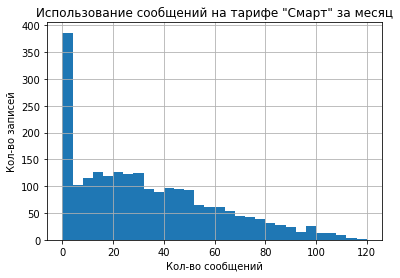

In [39]:
df_smart['messages'].hist(bins = 30, range = (0, 120))
plt.title('Использование сообщений на тарифе "Смарт" за месяц')
plt.xlabel("Кол-во сообщений")
plt.ylabel("Кол-во записей")

Text(0, 0.5, 'Кол-во записей')

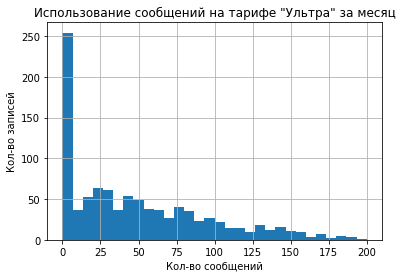

In [40]:
df_ultra['messages'].hist(bins = 30, range = (0, 200))
plt.title('Использование сообщений на тарифе "Ультра" за месяц')
plt.xlabel("Кол-во сообщений")
plt.ylabel("Кол-во записей")

Благодаря графикам, мы видим, что большая часть пользователей тарифа смарт звонят от 200 до 600 минут, после 500 минут заложеных в тариф кол-во клиентов потребляющих больше начинает снижаться, и к показателю 1000 минут спускается почти до 0. Пользователи тарифа ультра, судя по графику распределены примерно равномерно, единственное есть скачок на показателе 0, т.е. есть большое кол-во людей, которые не звонят вообще, а равномерное распределение объясняется тем что клиенты просто не успевают потратать весь объем тарифного пакета и им нет причин сдерживаться в продолжительности разговора, по стравнению с тарифом смарт.

В части потребления интернет трафика, мы видим что пользователи обоих тарифов потребляют в среднем от 10 до 30 гб. Мы также видим, что больше половины пользователей тарифа смарт превышают установленный тарифом лимит и переплачивают за дополнительные гигабайты, в случае если пользователи тарифа смарт окажутся выгоднее для компании, я считаю это одним из основных факторов. С учетом расценок на потребленный трафик сверх тарифа, на месте людей потребляющих в среднем более 20 гб в месяц на тарифе смарт, я бы задумался о переходе на тариф ультра.   

А в части отправки сообщений, ситуация похожа на ситуцию со звонками - после лимита у пользователей тарифа смарт снижается кол-во клиентов отправляющих более 50 сообщений, а в тарифе ультра распределение более плавное хоть и также идет на убывание, судя по графику пользователи тарифа ультра не доходят до предела никогда. Отдельно хочется отметить что сообщения не самая популярная услуга, порядка трети пользователей не пользуются сообщениями вообще.

А теперь давайте оценим использование услуг связи методом трех сигм.

In [41]:
#звонки
mu_calls_smart = df_smart['duration'].mean()
sigma_calls_smart = np.std(df_smart['duration'], ddof = 1)
lim_calls_smart = mu_calls_smart + (3 * sigma_calls_smart)
dispersion_calls_smart = sigma_calls_smart ** 2

In [42]:
mu_calls_ultra = df_ultra['duration'].mean()
sigma_calls_ultra = np.std(df_ultra['duration'], ddof = 1)
dispersion_calls_ultra = sigma_calls_ultra ** 2
lim_calls_ultra = mu_calls_ultra + (3 * sigma_calls_ultra)

In [43]:
#интернет
mu_internet_smart = df_smart['gb_used'].mean()
sigma_internet_smart = np.std(df_smart['gb_used'], ddof = 1)
lim_internet_smart = mu_internet_smart + (3 * sigma_internet_smart)
dispersion_internet_smart = sigma_internet_smart ** 2

In [44]:
mu_internet_ultra = df_ultra['gb_used'].mean()
sigma_internet_ultra = np.std(df_ultra['gb_used'], ddof = 1)
lim_internet_ultra = mu_internet_ultra + (3 * sigma_internet_ultra)
dispersion_internet_ultra = sigma_internet_ultra ** 2

In [45]:
#сообщения
mu_messages_smart = df_smart['messages'].mean()
sigma_messages_smart = np.std(df_smart['messages'], ddof = 1)
lim_messages_smart = mu_messages_smart + (3 * sigma_messages_smart)
dispersion_messages_smart = sigma_messages_smart ** 2

In [46]:
mu_messages_ultra = df_ultra['messages'].mean()
sigma_messages_ultra = np.std(df_ultra['messages'], ddof = 1)
lim_messages_ultra = mu_messages_ultra + (3 * sigma_messages_ultra)
dispersion_messages_ultra = sigma_messages_ultra ** 2

In [47]:
table_ultra_smart = pd.DataFrame({'name': ['mu calls', 'sigma call', 'dispersion call', 'lim call', 'mu internet', 'sigma internet', 'dispersion internet', 'lim internet', 'mu messages', 'sigma messages', 'dispersion messages', 'lim messages'], 
                                'smart': [mu_calls_smart, sigma_calls_smart, dispersion_calls_smart, lim_calls_smart, mu_internet_smart, sigma_internet_smart, dispersion_internet_smart, lim_internet_smart, mu_messages_smart, sigma_messages_smart, dispersion_messages_smart, lim_messages_smart],
                                'ultra': [mu_calls_ultra, sigma_calls_ultra, dispersion_calls_ultra, lim_calls_ultra, mu_internet_ultra, sigma_internet_ultra, dispersion_internet_ultra, lim_internet_ultra, mu_messages_ultra, sigma_messages_ultra, dispersion_messages_ultra, lim_messages_ultra]
                                })
table_ultra_smart

,name,smart,ultra
0,mu calls,417.747534,526.089249
1,sigma call,190.476754,317.887549
2,dispersion call,36281.393836,101052.493549
3,lim call,989.177796,1479.751895
4,mu internet,16.321525,19.474645
5,sigma internet,5.756167,9.868057
6,dispersion internet,33.133453,97.378544
7,lim internet,33.590024,49.078815
8,mu messages,33.369058,49.313387
9,sigma messages,28.230396,47.806040


Рассчитаные параметры подтверждают выводы сделаные по гистограммам, единственное дополнительно дают представление о разбросе данных. Согласно закону трех сигм, с наибольшей вероятностью:

1) В 84% случаев смарт клиенты разговаривают в пределах 608 минут, и 99%  в пределах 989 минут

2) В 84% случаев тарифа смарт клиенты используют порядка 23 гб, и 99%  в пределах 34 гб

3) В 84% случаев тарифа смарт клиенты отправляют в пределах 62 сообщений, и 99%  в пределах 119 сообщений

4) В 84% случаев тарифа ультра клиенты разговаривают в пределах 843 минут, и 99%  в пределах 1480 минут

5) В 84% случаев тарифа ультра клиенты используют в пределах 30 гб, и 99%  в пределах 50 гб

6) В 84% случаев тарифа ультра клиенты отправляют в пределах 98 сообщений, и 99%  в пределах 193 сообщений

Давайте рассмотрим параметры по оплате тарифов

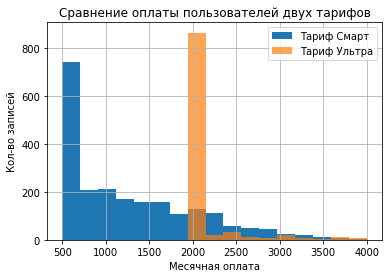

In [48]:
df_smart['total_price'].hist(bins = 17, range = (500, 4000), label='Тариф Смарт')
df_ultra['total_price'].hist(bins = 17, range = (500, 4000), alpha = 0.7, label='Тариф Ультра')
plt.title('Сравнение оплаты пользователей двух тарифов')
plt.xlabel("Месячная оплата")
plt.ylabel("Кол-во записей")
plt.legend()

По таким графикам сделать вывод уже не получится, большая часть клиентов предпочитает не выходить за рамки тарифа что дает нам два самых большие значения, на фоне которых все остальные слишком малы чтобы оценить их на глаз. А даже если мы увеличим графики, уберем выделяющиеся значения, то это все равно не даст нам понимания клиенты какого тарифа приносят большую прибыль для компании. 

In [49]:
sum_smart_price = df_smart['total_price'].sum().astype('int')
count_smart_price = df_smart['total_price'].count().astype('int')
mu_smart_price = df_smart['total_price'].mean().astype('int')
median_smart_price = df_smart['total_price'].median().astype('int')
sigma_smart_price = np.std(df_smart['total_price'], ddof = 1).astype('int')
dispersion_smart_price = (sigma_smart_price ** 2).astype('int')

In [50]:
sum_ultra_price = df_ultra['total_price'].sum().astype('int')
count_ultra_price = df_ultra['total_price'].count().astype('int')
mu_ultra_price = df_ultra['total_price'].mean().astype('int')
median_ultra_price = df_ultra['total_price'].median().astype('int')
sigma_ultra_price = np.std(df_ultra['total_price'], ddof = 1).astype('int')
dispersion_ultra_price = (sigma_ultra_price ** 2).astype('int')

In [51]:
table_ultra_smart_price = pd.DataFrame({'name': ['Сумма', 'Количество записей', 'Среднее (Мю)', 'Медиана', 'Сигма', 'Дисперсия'], 
                                'smart': [sum_smart_price, count_smart_price, mu_smart_price, median_smart_price, sigma_smart_price, dispersion_smart_price],
                                'ultra': [sum_ultra_price, count_ultra_price, mu_ultra_price, median_ultra_price, sigma_ultra_price, dispersion_ultra_price]
                                })
table_ultra_smart_price

,name,smart,ultra
0,Сумма,2875901,2041050
1,Количество записей,2230,986
2,Среднее (Мю),1289,2070
3,Медиана,1021,1950
4,Сигма,818,376
5,Дисперсия,669124,141376


Исходя из ручного исследования данной выборки мы видим что большую часть дохода за 2018 год принесли пользователи тарифа смарт, это произошло во многом потому, что в данной выборке количество месяцев потребления тарифа смарт превышают тариф ультра более чем в два раза. При этом тариф ультра имеет более высокие показатели среднего и медианного значения. При таком поверхностном исследовании данных я бы сделал предположение что выгоднее вкладываться в рекламу тарифа ультра, поскольку новый пользователь в среднем каждый месяц приносит больше дохода.

## Проверка гипотез

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Примем за нулевую гипотезу что средняя выручка от пользователей двух тарифов одинакова, в противном случае при отказе от нулевой гипотезы будем предполагать что верна обратная гипотеза - что выручка различается.

In [52]:
alpha = 0.05
result_first = st.ttest_ind(df_smart['total_price'], df_ultra['total_price'], equal_var = False)
result_first.pvalue

1.927011394420941e-250

In [53]:
if (result_first.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Полученное значение pvalue говорит о том, что средняя выручнка от клиентов этих двух тарифов, с высокой вероятностью отличается, о чем мы говорили ранее при рассмотрении данных. Мы уверенно можем отвергнуть мысль о том что что их средняя выручка одинакова.

### средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [54]:
df_moscow = df_total.query('city == "Москва"')
df_other = df_total.query('city != "Москва"')
df_moscow.describe()

,user_id,month,duration,mb_used,messages,over_minute,over_messages,over_gb,total_price,gb_used
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,1268.872340,8.432079,469.150573,17963.374795,37.877250,24.924714,2.512275,2.070376,1546.713584,18.050736
std,137.530432,2.888057,241.535044,7844.992114,37.160304,64.196759,8.619522,3.230483,752.088071,7.645788
min,1001.000000,1.000000,0.000000,365.000000,0.000000,0.000000,0.000000,0.000000,550.000000,1.000000
25%,1171.000000,6.000000,304.000000,12612.000000,6.500000,0.000000,0.000000,0.000000,780.500000,13.000000
50%,1291.000000,9.000000,453.000000,17537.000000,29.000000,0.000000,0.000000,0.000000,1750.000000,18.000000
75%,1385.000000,11.000000,620.500000,22114.500000,57.000000,0.000000,0.000000,4.000000,1950.000000,22.000000
max,1490.000000,12.000000,1321.000000,44296.000000,191.000000,522.000000,59.000000,20.000000,5321.000000,44.000000


In [55]:
df_other.describe()

,user_id,month,duration,mb_used,messages,over_minute,over_messages,over_gb,total_price,gb_used
count,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000
mean,1247.535125,8.293282,446.698656,17016.521689,38.346641,29.754319,4.373512,2.374664,1524.725144,17.109405
std,145.994150,2.910066,242.076254,7507.647480,35.915233,74.966636,12.057459,3.574763,808.745680,7.344701
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000
25%,1120.000000,6.000000,280.000000,12450.000000,9.000000,0.000000,0.000000,0.000000,750.000000,13.000000
50%,1241.000000,9.000000,440.000000,16848.000000,30.000000,0.000000,0.000000,0.000000,1583.000000,17.000000
75%,1377.000000,11.000000,584.000000,21231.000000,57.000000,0.000000,0.000000,4.000000,1950.000000,21.000000
max,1499.000000,12.000000,1673.000000,49745.000000,224.000000,935.000000,93.000000,23.000000,6770.000000,49.000000


In [56]:
sigma_moscow_price = np.std(df_moscow['total_price'], ddof = 1)
sigma_moscow_price ** 2

565636.467011886

In [57]:
sigma_other_price = np.std(df_other['total_price'], ddof = 1)
sigma_other_price ** 2

654069.574962777

Примем за нулевую гипотезу, то что средняя выручка от пользователей из Москвы такая же как и у других городов, в противном случае, при отказе от нулевой гипотезы будем считать что выручка различается. 

In [58]:
result_second = st.ttest_ind(df_moscow['total_price'], df_other['total_price'], equal_var = False)
result_second.pvalue

0.5216952110000278

In [59]:
if (result_second.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное значение pvalue говорит о том, что вероятность равной средней выручки в Москве и других регионах, составляет порядка 50% и на основании данной выборки мы не можем достоверно это утверждать. Поскольку тарифы одинаковы для разных городов и показатели среднего и медианы между двумя таблицами имеют довольно близкие значения, я склоняюсь к тому что потребности людей независимо от города схожи, и выручка вполне может стремиться к одинаковой.

## Общий вывод

После анализа данных, я бы рекомендовал руководству данной компании проводить более агрессивную рекламную кампанию тарифа Ультра, потому что как мы убедились гипотеза о равенстве выручки этих двух тарифов не верна, а также судя по показателям данной выборки, в среднем каждый клиент тарифа ультра приносит больше прибыли.  